In [1]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     --------                                61.4/293.3 kB 1.7 MB/s eta 0:00:01
     -------------------------              194.6/293.3 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Visualizing Data

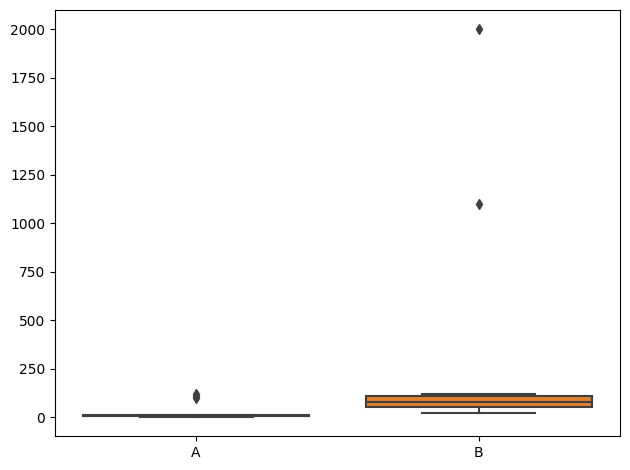

In [6]:
# create a DataFrame with some outliers
df = pd.DataFrame({
    'A':[1,2,3,4,5,6,7,8,9,10,110,100,120],
    'B':[20,30,40,50,60,70,80,90,100,110,120,1100,2000]
})
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

## Calculate Summary Statistics

In [5]:
df.describe()

,A,B
count,13.000000,13.000000
mean,29.615385,297.692308
std,46.082423,586.147789
min,1.000000,20.000000
25%,4.000000,50.000000
50%,7.000000,80.000000
75%,10.000000,110.000000
max,120.000000,2000.000000


## Use Statistical Test

In [10]:
import numpy as np
from scipy import stats

z_score_a = stats.zscore(df['A']) 
z_score_b = stats.zscore(df['B'])
filtered_entries_a = (np.abs(z_score_a)<1)
filtered_entries_b = (np.abs(z_score_a)<2)
new_df = df[filtered_entries_a & filtered_entries_a]
print(new_df)

    A    B
0   1   20
1   2   30
2   3   40
3   4   50
4   5   60
5   6   70
6   7   80
7   8   90
8   9  100
9  10  110


## Handling Outliers

### Trimming 

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_trim = df[~((df<(Q1 - 1.5*IQR))| (df > (Q3 + 1.5*IQR))).any(axis=1)]
df_trim


,A,B
0,1,20
1,2,30
2,3,40
3,4,50
4,5,60
5,6,70
6,7,80
7,8,90
8,9,100
9,10,110


### Winsorization method

In [11]:
# Winsorization method
df_wins = df.copy()
df_wins['A'] = np.where(df_wins['A'] > Q3['A'], Q3['A'], np.where(df_wins['A'] < Q1['A'], Q1['A'], df_wins['A']))
df_wins['B'] = np.where(df_wins['B'] > Q3['B'], Q3['B'], np.where(df_wins['B'] < Q1['B'], Q1['B'], df_wins['B']))
df_wins

,A,B
0,4.0,50.0
1,4.0,50.0
2,4.0,50.0
3,4.0,50.0
4,5.0,60.0
5,6.0,70.0
6,7.0,80.0
7,8.0,90.0
8,9.0,100.0
9,10.0,110.0


In [12]:
# Capping method
df_cap = df.copy()
df_cap['A'] = np.where(df_cap['A'] > 10*Q3['A'], 10*Q3['A'], np.where(df_cap['A'] < 10*Q1['A'], 10*Q1['A'], df_cap['A']))
df_cap['B'] = np.where(df_cap['B'] > 10*Q3['B'], 10*Q3['B'], np.where(df_cap['B'] < 10*Q1['B'], 10*Q1['B'], df_cap['B']))
df_cap

,A,B
0,40.0,500.0
1,40.0,500.0
2,40.0,500.0
3,40.0,500.0
4,40.0,500.0
5,40.0,500.0
6,40.0,500.0
7,40.0,500.0
8,40.0,500.0
9,40.0,500.0
